#Spatial Weights

Spatial weights are mathematical structures used to represent spatial relationships. Many spatial analytics, such as spatial autocorrelation statistics and regionalization algorithms rely on spatial weights. Generally speaking, a spatial weight  𝑤𝑖,𝑗  expresses the notion of a geographical relationship between locations  𝑖  and  𝑗 . These relationships can be based on a number of criteria including contiguity, geospatial distance and general distances.

In [1]:
!pip install libpysal
!pip install pysal
!pip install geopandas folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

#Importing the necessary libraries




In [57]:
import libpysal
from libpysal.weights import Queen, Rook, KNN, Kernel
from pysal.lib import weights
import numpy as np
import geopandas as gpd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import shapely
import folium
from folium import plugins



In [3]:
dc_census_block = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/BG/tl_2020_11_bg.zip")

dc_census_block.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010800,1,110010108001,Block Group 1,G5030,S,112810,0,+38.9005669,-077.0474728,"POLYGON ((-77.05014 38.90033, -77.05013 38.900..."
1,11,001,010900,2,110010109002,Block Group 2,G5030,S,2270174,2933566,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
2,11,001,007401,1,110010074011,Block Group 1,G5030,S,1029053,200980,+38.8668098,-076.9949201,"POLYGON ((-77.00540 38.86879, -77.00341 38.870..."
3,11,001,007403,1,110010074031,Block Group 1,G5030,S,126738,0,+38.8481009,-076.9774095,"POLYGON ((-76.98127 38.84662, -76.98098 38.846..."
4,11,001,007404,1,110010074041,Block Group 1,G5030,S,360630,0,+38.8514546,-076.9784997,"POLYGON ((-76.98334 38.85337, -76.98277 38.853..."


# Types of Spatial Weights

##Contiguity based weights

Queen Weights

A commonly-used type of weight is a queen contigutiy weight, which reflects adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a vertex with another polygon. These weights are symmetric, in that when polygon 𝐴 neighbors polygon 𝐵, both 𝑤𝐴𝐵=1 and 𝑤𝐵𝐴=1.

In [4]:
qW = Queen.from_dataframe(dc_census_block)

<ipython-input-4-9b74c411f57b>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  qW = Queen.from_dataframe(dc_census_block)


All weights objects have a few traits that you can use to work with the weights object, as well as to get information about the weights object.

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [6]:
qW[20]

{496: 1.0, 21: 1.0, 554: 1.0, 555: 1.0, 557: 1.0}

By default, the weights and the pandas dataframe will use the same index. So, we can view the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list:

In [7]:
self_and_neighbors = [20]
self_and_neighbors.extend(qW.neighbors[20])
print(self_and_neighbors)

[20, 496, 21, 554, 555, 557]


In [8]:
dc_census_block.loc[self_and_neighbors]

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
20,11,001,007809,1,110010078091,Block Group 1,G5030,S,255912,0,+38.9017541,-076.9278893,"POLYGON ((-76.93167 38.90304, -76.93149 38.903..."
496,11,001,007804,1,110010078041,Block Group 1,G5030,S,270528,4302,+38.8985775,-076.9350753,"POLYGON ((-76.93919 38.89944, -76.93919 38.899..."
21,11,001,007809,2,110010078092,Block Group 2,G5030,S,279342,0,+38.9013442,-076.9361406,"POLYGON ((-76.94248 38.90203, -76.94221 38.902..."
554,11,001,007806,1,110010078061,Block Group 1,G5030,S,294019,0,+38.9059712,-076.9290685,"POLYGON ((-76.93308 38.90965, -76.93286 38.909..."
555,11,001,007806,2,110010078062,Block Group 2,G5030,S,377415,0,+38.9052976,-076.9352658,"POLYGON ((-76.94286 38.90205, -76.94234 38.902..."
557,11,001,007807,2,110010078072,Block Group 2,G5030,S,281391,0,+38.8991961,-076.9232083,"POLYGON ((-76.92627 38.89665, -76.92614 38.897..."


Since weight matrices are typically very sparse, there is also a sparse weights matrix constructor:

In [9]:
qW.sparse

<571x571 sparse matrix of type '<class 'numpy.float64'>'
	with 3618 stored elements in Compressed Sparse Row format>

<Axes: >

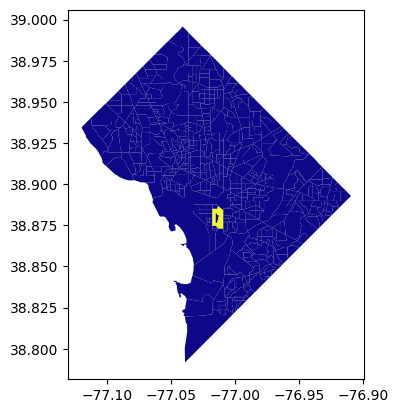

In [10]:
dc_census_block.assign(weights = qW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')

In [13]:
weights_df = gpd.GeoDataFrame(index=dc_census_block.index)
weights_df['neighbors'] = [qW.neighbors[idx] for idx in dc_census_block.index]
weights_df['weights'] = [qW.weights[idx] for idx in dc_census_block.index]


In [16]:
rprj_dc= dc_census_block.to_crs('26985')

We can work with the reprojected file as well in order to avoid warnings for using GCS.

In [45]:
w_queen = weights.contiguity.Queen.from_dataframe(rprj_dc)


<ipython-input-45-807ab7594000>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.contiguity.Queen.from_dataframe(rprj_dc)


In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4))

for i in range(2):
    ax = dc_census_block.plot(
        edgecolor="k", facecolor="w", ax=axs[i]
    )

    # Plot graph connections
    qW.plot(
        dc_census_block,
        ax=axs[i],
        edge_kws=dict(color="r", linestyle=":", linewidth=1),
        node_kws=dict(marker=""),
    )

    # Remove the axis
    axs[i].set_axis_off()

# Adjust the limits for the second subplot if needed
axs[1].axis([-77.05, -76.95, 38.85, 38.95])
plt.show()

Rook Weights

Rook weights are another type of contiguity weight, but consider observations as neighboring only when they share an edge. The rook neighbors of an observation may be different than its queen neighbors, depending on how the observation and its nearby polygons are configured.

In [19]:
rW = weights.Rook.from_dataframe(dc_census_block)


<ipython-input-19-d0d9323212a0>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  rW = weights.Rook.from_dataframe(dc_census_block)


0.9041807625421343


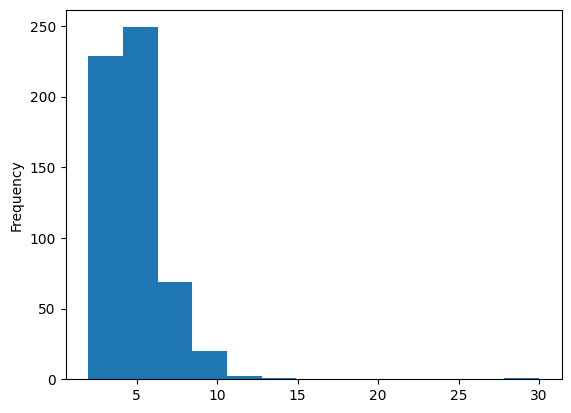

In [22]:
print(rW.pct_nonzero)
s = pd.Series(rW.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

##Distance based weights


In addition to contiguity, we can also define neighbor relations as a function of the distance separating spatial observations. Usually, this means that a matrix expressing the distances between all pairs of observations are required. These are then provided to a kernel function which uses the proximity information to model proximity as a smooth function of distance.

K-nearest neighbor weights

In [52]:
dc_knn8 = weights.KNN.from_dataframe(dc_census_block, k=8)


Kernel weights

Kernel weights are one of the most commonly-used kinds of distance weights. They reflect the case where similarity/spatial proximity is assumed or expected to decay with distance. The essence of kernel weights is that the weight between observations
 and
 is based on their distance, but it is further modulated by a kernel function with certain properties.

<Axes: >

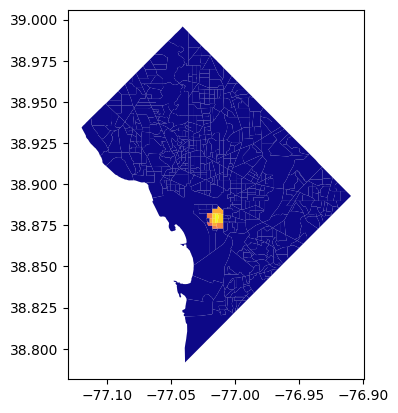

In [24]:
kernelWa = Kernel.from_dataframe(dc_census_block, k=10, fixed=False, function='gaussian')
dc_census_block.assign(weights =
          kernelWa.sparse[100,:].toarray().flatten()).plot('weights',
                                                           cmap='plasma')

In [25]:
kernelWa.bandwidth

array([[0.00615945],
       [0.03035156],
       [0.01232805],
       [0.00964701],
       [0.00984104],
       [0.01031367],
       [0.00882213],
       [0.009995  ],
       [0.01142681],
       [0.01082504],
       [0.0117913 ],
       [0.00685579],
       [0.00901076],
       [0.0079687 ],
       [0.00709471],
       [0.00865141],
       [0.0096955 ],
       [0.01352964],
       [0.00894407],
       [0.00889993],
       [0.01093833],
       [0.01052986],
       [0.00706193],
       [0.00689995],
       [0.00894303],
       [0.00666662],
       [0.00751971],
       [0.00699445],
       [0.00597398],
       [0.00662136],
       [0.01639681],
       [0.02080875],
       [0.01883462],
       [0.01357388],
       [0.00687044],
       [0.01263494],
       [0.01084121],
       [0.00767334],
       [0.00741991],
       [0.00733706],
       [0.00858378],
       [0.00998136],
       [0.00515377],
       [0.00494274],
       [0.00490063],
       [0.00710343],
       [0.00721425],
       [0.006

<Axes: >

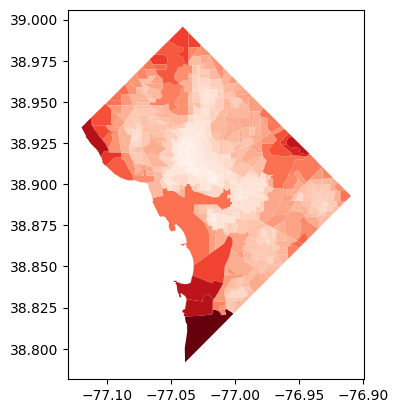

In [26]:
dc_census_block.assign(bw=kernelWa.bandwidth.flatten()).plot('bw', cmap='Reds')

fixed bandwidths for the map and weight according to a gaussian kernel

bandwidth = maximum of (the distances to the kth nearest neighbor for all observations)

<Axes: >

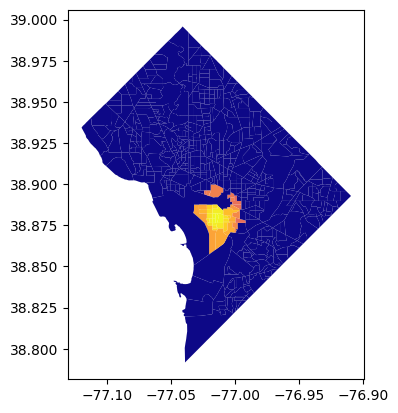

In [27]:
kernelWa = Kernel.from_dataframe(dc_census_block, k=2, fixed=True, function='gaussian')

dc_census_block.assign(weights=kernelWa.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')

##Block Weights

Block weights connect every observation in a dataset that belongs to the same category in a provided list. In essence, a block weight structure groups individual observations and considers all members of the group as “near” one another. This means that they then have a value of one for every pair of observations in the same group. Contrariwise, all members not in that group are considered disconnected from any observation within the group, and given a value of zero. This is done for every group, so the resulting matrix looks like “blocks” of 1s stacked on the diagonal (assuming that observations in the same group are near one another in the input data table), hence the “block” weights.

In [28]:
w,s,e,n = dc_census_block.total_bounds

In [29]:
dx = (w+e)/2
dy = (n+s)/2

In [30]:
centroids = dc_census_block.geometry.centroid

<ipython-input-30-5b3fe1f2897b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = dc_census_block.geometry.centroid


In [31]:
lon = centroids.apply(lambda p: p.x).values
lat = centroids.apply(lambda p: p.y).values

In [32]:
north = lat > dy
south = lat <= dy
east = lon > dx
west = lon <= dx

In [33]:
nw = west * north * 2
ne = east * north * 1
sw = west * south * 3
se = east * south *4
quad = nw + ne + sw + se
quad

array([2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 1, 4, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 1,
       4, 2, 1, 1, 2, 4, 4, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       1, 1, 1, 1, 1, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 3, 3, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 2, 4, 1, 1, 4, 2, 2,
       2, 2, 4, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1,
       1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 3, 4, 1, 1, 1, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<Axes: >

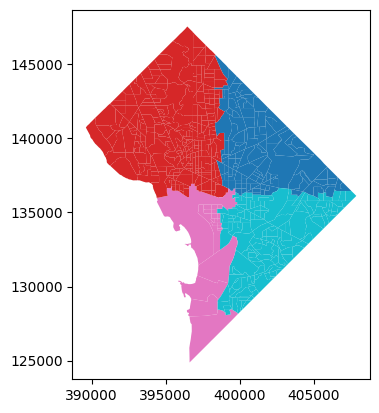

In [48]:
rprj_dc['quad'] = quad
rprj_dc.plot(column="quad", categorical=True)

In [35]:
dx_bw = weights.util.block_weights(dc_census_block["quad"].values)


/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


#Visualizing weight set operations

Comparison of neighbor graphs that results from some of the criteria introduced to define neighbor relations.

Text(0.5, 1.0, 'Block weights')

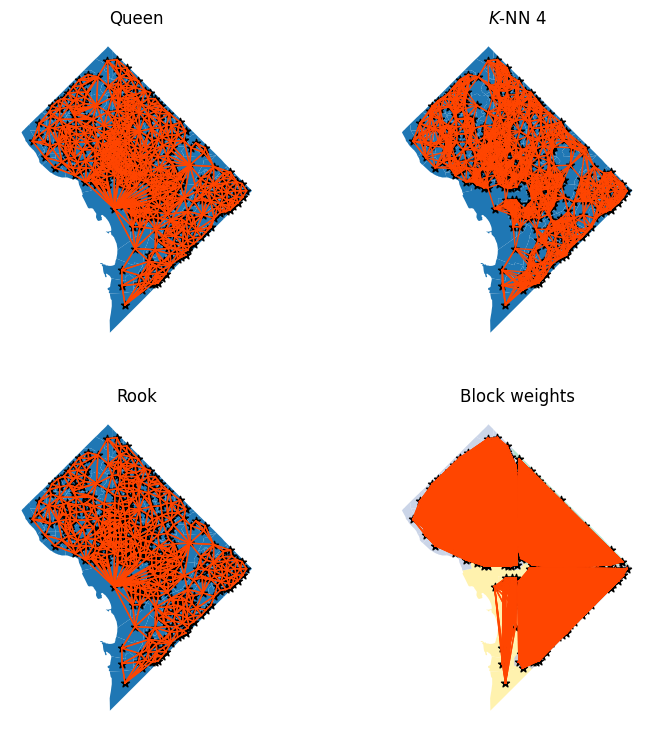

In [56]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Contiguity
ax = axs[0, 0]
rprj_dc.plot(ax=ax)
w_queen.plot(
    rprj_dc,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen")

# KNN
ax = axs[0, 1]
rprj_dc.plot(ax=ax)
dc_knn8.plot(
    rprj_dc,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("$K$-NN 4")

# RW
ax = axs[1, 0]
rprj_dc.plot(ax=ax)
rW.plot(
    rprj_dc,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Rook")

# Block
ax = axs[1, 1]
rprj_dc.plot(column="quad", categorical=True, cmap="Pastel2", ax=ax)
dx_bw.plot(
    rprj_dc,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Block weights")



#Visualization of blocks and their neighbours based on Queen, Rook and KNN

In [60]:
def style_function(feature):
    return {
        'fillColor': 'orange',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# Define a highlight function to set the color on hover
def highlight_function(feature):
    return {
        'fillColor': 'red',  # Color for the hovered block
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7
    }


In [61]:
dc_census_block['queen_neighbors'] = [qW.neighbors[idx] for idx in dc_census_block.index]
dc_census_block['rook_neighbors'] = [rW.neighbors[idx] for idx in dc_census_block.index]
dc_census_block['knn_neighbors'] = [dc_knn8.neighbors[idx] for idx in dc_census_block.index]


In [62]:
dc_census_block['queen_neighbors'] = dc_census_block['queen_neighbors'].astype(str)
dc_census_block['rook_neighbors'] = dc_census_block['rook_neighbors'].astype(str)
dc_census_block['knn_neighbors'] = dc_census_block['knn_neighbors'].astype(str)

In [63]:

# Create a folium map centered around DC
dc_map = folium.Map(location=[dc_census_block.geometry.centroid.y.mean(), dc_census_block.geometry.centroid.x.mean()], zoom_start=11)

# Add the GeoJson layer for the blocks with Queen, Rook, and KNN neighbors information
folium.GeoJson(dc_census_block, name='geojson',
               #style_function=lambda x: {'fillColor': 'orange'},
               style_function=style_function,
               highlight_function=highlight_function,
               tooltip=folium.features.GeoJsonTooltip(
                   fields=['GEOID', 'queen_neighbors', 'rook_neighbors', 'knn_neighbors'],
                   aliases=['Block ID', 'Queen Neighbors', 'Rook Neighbors', 'KNN Neighbors'],
                   sticky=True,
                   localize=True,
                   labels=True,
                   style="font-weight: bold;",
                   highlight= True
               )).add_to(dc_map)

# Save the map to an HTML file
dc_map.save("dc_map_with_neighbors.html")

<ipython-input-63-43c8e3944ea2>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dc_map = folium.Map(location=[dc_census_block.geometry.centroid.y.mean(), dc_census_block.geometry.centroid.x.mean()], zoom_start=11)


In [64]:
dc_map